In [137]:
from stepmix.stepmix import StepMix
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import pickle as pkl

In [145]:
df = pd.read_csv("../data/cleaned_data_SYMPTOMS_9_13_23.csv", index_col=0)
sympdf = df.loc[:, df.columns.str.startswith('Symptom_')]
sympdf.shape

(6031, 162)

In [146]:
fulllist = sympdf.columns.tolist()

In [147]:
fullset = pd.DataFrame(data = {'symptoms':fulllist}
)

In [148]:
# split the index using underscore and put the values into columns of fullset
fullset[['label','category','c','d','e','f','g']] = fullset['symptoms'].str.split('_',expand=True)



In [149]:
symptoms_with_cat = fullset.loc[:,['symptoms','category']]

In [150]:
symptoms_with_cat.index = symptoms_with_cat["symptoms"]

In [151]:
# aggregate by category (no fine touch)
# for each category in symptoms_with_cat['b'], get the list of symptoms
# and put them into a dictionary
symptoms_by_cat = {}
for cat in symptoms_with_cat['b'].unique():
    symptoms_by_cat[cat] = symptoms_with_cat.loc[symptoms_with_cat['b'] == cat, 'symptoms'].tolist() 

KeyError: 'b'

In [152]:
symptoms_by_cat

# I don't love these categories actually
new_dict = {
    'Memory': ['Symptom_Memory_short',
               'Symptom_Memory_long',
               'Symptom_Memory_no_new_memories',
               'Symptom_Memory_forget_tasks',
               'Symptom_Memory_other'],
   'Cognitive': ['Symptom_Cognitive_Functioning_thinking',
                'Symptom_Cognitive_Functioning_executive',
                'Symptom_Cognitive_Functioning_problemsolving',
                'Symptom_Cognitive_Functioning_slowedthoughts',
                'Symptom_Cognitive_Functioning_fastthoughts',
                'Symptom_Cognitive_Functioning_agnosia',
                'Symptom_Cognitive_Functioning_attentionconcentration',
                'Symptom_Speech_difficulty_reading_processing_text',
                'Symptom_Cognitive_Functioning_other',
                'Symptom_Acute_confusion'],
    'Speech': ['Symptom_Speech_difficulty_finding_words',
                'Symptom_Speech_difficulty_communicating_verbally',
                'Symptom_Speech_difficulty_speaking_complete_sentences',
                'Symptom_Speech_speaking_unrecognizable_words',
                'Symptom_Speech_difficulty_communicating_writing',
                'Symptom_Speech_changes_to_secondary_languages',
                'Symptom_Speech_other',
                'Symptom_Slurring_words'],
    'Auditory': ['Symptom_Speech_difficulty_understanding_others_speech',
                'Symptom_Hallucinations_auditory',
                'Symptom_Hearing_loss',
                'Symptom_Tinnitus','Symptom_Ear_sensitivity_to_noise',
                'Symptom_Ear_ear_pain',
                'Symptom_Ear_changes_to_ear_canal',
                'Symptom_Ear_numbness',
                'Symptom_Other_ear_hearing_symptoms'
                ],
    'Headaches': ['Symptom_Headaches_behind_eyes',
                'Symptom_Headaches_stiff_neck',
                'Symptom_Headaches_brain_pressure',
                'Symptom_Headaches_diffuse',
                'Symptom_Headaches_temples',
                'Symptom_Headaches_base_of_skull',
                'Symptom_Headaches_after_mental_exertion',
                'Symptom_Headaches_migraines',
                'Symptom_Headaches_other',
                'Symptom_Headaches_brain_warmth'],
    'Olfaction': ['Symptom_Loss_of_smell',
                'Symptom_Loss_of_taste',
                'Symptom_Altered_smell',
                'Symptom_Altered_taste',
                'Symptom_Phantom_smell',
                'Symptom_Phantom_taste',
                'Symptom_Heightened_smell',
                'Symptom_Heightened_taste',],
    'Gastrointenstinal': ['Symptom_Loss_of_appetite',
                          'Symptom_Constipation',
                          'Symptom_Diarrhea',
                          'Symptom_Vomiting',
                          'Symptom_Nausea',
                          'Symptom_Acid_reflux',
                          'Symptom_Gastrointestinal_feeling_full_quickly_eating',
                          'Symptom_Gastrointestinal_abdominal_pain',
                          'Symptom_Gastrointestinal_hyperactive_bowel'],
    'Sensory': ['Symptom_Vibrating_sensations',
            'Symptom_Hallucinations_tactile',
            'Symptom_Sensations_skin_burning_no_rash',
            'Symptom_Sensations_numbness_loss_sensation',
            'Symptom_Sensations_tingling_prickling',
            'Symptom_Sensations_electrical_zaps',
            'Symptom_Sensations_facial_pressure_left',
            'Symptom_Sensations_facial_pressure_right',
            'Symptom_Sensations_facial_pressure_other'
            ],
    'Motor': ['Symptom_Tremors',
              'Symptom_Restless_leg',
              'Symptom_Sensations_weakness',
              'Symptom_Sensations_facial_paralysis'],
    'Sleep':['Symptom_Insomnia',
             'Symptom_Night_sweats',
             'Symptom_Awakened_cannot_breathe',
             'Symptom_Vivid_dreams',
             'Symptom_Lucid_dreams',
             'Symptom_Sleep_apnea',
             'Symptom_Sleep_other',
             'Symptom_Difficulty_falling_asleep',
             'Symptom_Waking_up_early',
             'Symptom_Waking_up_in_night',
             ],
    'Vision' : ['Symptom_Hallucinations_visual',
                'Symptom_Eye_vision_symptoms',
                'Symptom_Eye_Vision_blurred_vision',
                'Symptom_Eye_Vision_sensitivity_to_light',
                'Symptom_Eye_Vision_dry_eyes',
                'Symptom_Eye_Vision_eye_pressure_pain',
                'Symptom_Eye_Vision_floaters',
                'Symptom_Eye_Vision_double_vision',
                'Symptom_Eye_Vision_tunnel_vision',
                'Symptom_Eye_Vision_loss_of_vision',
                'Symptom_Eye_Vision_seeing_things_peripheral_vision',
                'Symptom_Eye_Vision_other_eye_issues'],
    'Temperature': ['Symptom_Sensations_coldness',
                    'Symptom_Temp_lability',
                    'Symptom_Heat_intolerance',
                    'Symptom_Merged_temperature_other_temp_issues',
                    'Symptom_Elevated_temp',
                    'Symptom_Fever',
                    'Symptom_Low_temp',
                    'Symptom_Chills_flushing_sweats'],
    'Cardiac':['Symptom_Tachycardia',
               'Symptom_Bradycardia',
               'Symptom_Heart_palpitations',
               'Symptom_Fainting',
               'Symptom_Dizziness_vertigo'],
    'Respiratory': ['Symptom_Gasping_air_normal_oxygen',
                    'Symptom_Dry_cough',
                    'Symptom_Cough_with_mucus',
                    'Symptom_Coughing_up_blood',
                    'Symptom_Shortness_of_breath',
                    'Symptom_Tightness_of_chest',
                    'Symptom_Rattling_breath',
                    'Symptom_Respiratory_other'],
    'Allergic' : [ 'Symptom_New_anaphylaxis',
                   'Symptom_New_allergies',
                   'Symptom_Sneezing',
                   'Symptom_Runny_nose',
                   'Symptom_Dermatographia',
                   'Symptom_Skin_Allergy_other',
                   'Symptom_SkinAllergy_itchy_skin',
                   'Symptom_SkinAllergy_itchy_eyes',
                   'Symptom_SkinAllergy_heighted_reaction_allergies',],
    'Genitourinary': ['Symptom_Reproductive_all_menstrual_issues',
                'Symptom_Reproductive_early_menopause',
                'Symptom_Reproductive_abnormally_heavy_periods_clotting',
                'Symptom_Reproductive_testicle_penis_pain_changes',
                'Symptom_Reproductive_sexual_dysfunction',
                'Symptom_Reproductive_postmenopausal_bleeding',
                'Symptom_Reproductive_other_urinary_issues',
                'Symptom_Reproductive_other_menstrual_issues',
                'Symptom_Reproductive_abnormally_irregular_periods',
                'Symptom_Bladder_control',
                ],
    'Skin': ['Symptom_Peeling_skin',
             'Symptom_Petechiae',
             'Symptom_Covid_toes',
             'Symptom_Skin_rashes'],
    'Musculoskeletal': ['Symptom_Muscle_spasms', 
                        'Symptom_Muscle_aches',
                        'Symptom_Joint_pain',
                        'Symptom_Bone_ache_burning'],
    'Misc': ['Symptom_Difficulty_swallowing', 
            'Symptom_Hallucinations_other',
            'Symptom_Sensations_numbness_one_sided_weakness',
            'Symptom_Bulging_veins',
            'Symptom_Sore_throat',
            'Symptom_Inability_to_yawn',
            'Symptom_Changes_in_voice',
            'Symptom_Extreme_thirst',
            'Symptom_SkinAllergy_brittle_nail',
            'Symptom_SkinAllergy_other_itchy',
            'Symptom_SkinAllergy_shingles',
            'Symptom_PEM',
            'Symptom_Fatigue',
            'Symptom_Change_sensitivity_to_meds',
            'Symptom_Neuralgia',
            'Symptom_Pain_burning_chest',
            'Symptom_Eye_Vision_pink_eye',
            'Symptom_Eye_Vision_bloodshot_eyes',
            'Symptom_Eye_Vision_redness_outside_eye'],
}

# got through neuralgia

In [153]:
pd.DataFrame.from_dict(new_dict, orient='index')
# convert to long
symptoms_by_cat_long = pd.DataFrame.from_dict(new_dict, orient='index').stack().reset_index()

In [154]:
symptoms_by_cat_long.iloc[:,2]

0                        Symptom_Memory_short
1                         Symptom_Memory_long
2              Symptom_Memory_no_new_memories
3                 Symptom_Memory_forget_tasks
4                        Symptom_Memory_other
                        ...                  
156                         Symptom_Neuralgia
157                Symptom_Pain_burning_chest
158               Symptom_Eye_Vision_pink_eye
159         Symptom_Eye_Vision_bloodshot_eyes
160    Symptom_Eye_Vision_redness_outside_eye
Name: 0, Length: 161, dtype: object

In [155]:
groups_df = pd.DataFrame(symptoms_by_cat_long[[0,'level_0']].values)

In [156]:
groups_df.columns = ['symptom','group']

In [159]:
groups_df.to_csv('output/symptom_groups.csv',index=False)
groups_df.to_csv('../clusterings/Tessa/symptom_groups.csv',index=False)

In [160]:
# try looking at existing clusters on the new groups -- are they still distinguishable?
# also rank relative expression of each grouping -- either by mean or by max

# get the list of symptoms in each group
groups_df.group.unique()

array(['Memory', 'Cognitive', 'Speech', 'Auditory', 'Headaches',
       'Olfaction', 'Gastrointenstinal', 'Sensory', 'Motor', 'Sleep',
       'Vision', 'Temperature', 'Cardiac', 'Respiratory', 'Allergic',
       'Genitourinary', 'Skin', 'Musculoskeletal', 'Misc'], dtype=object)

In [161]:
# import my clusters, compare average scores for each of these groups across clusters
clus = pd.read_csv("output/cluster_13_111023.csv", index_col=0)

In [162]:
sympdf['cluster'] = clus

/var/folders/_j/9fb8r7hn7zx13rt7glsw4j3h0000gn/T/ipykernel_91090/4197125953.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sympdf['cluster'] = clus


In [185]:
avg_scores_by_grouping = {}

for grouping in groups_df.group.unique():
    # calculat the average score for each symptom in the group for each cluster in 'cluster'
    keepcols = groups_df.loc[groups_df.group == grouping, 'symptom'].tolist()
    #print(keepcols)
    keepcols.append('cluster')
    a = sympdf.loc[:, keepcols]
    avg = a.groupby('cluster').mean()
    avg_scores_by_grouping[grouping] = avg.mean(axis=1)
    #avg = sympdf.loc[:, sympdf.columns.str.startswith(grouping)].groupby(clus).mean()



In [189]:
avgdf  = pd.DataFrame(avg_scores_by_grouping)
# this is getting me the average over patients for each symptom
# I think I maybe need to transpose 

<Axes: xlabel='cluster'>

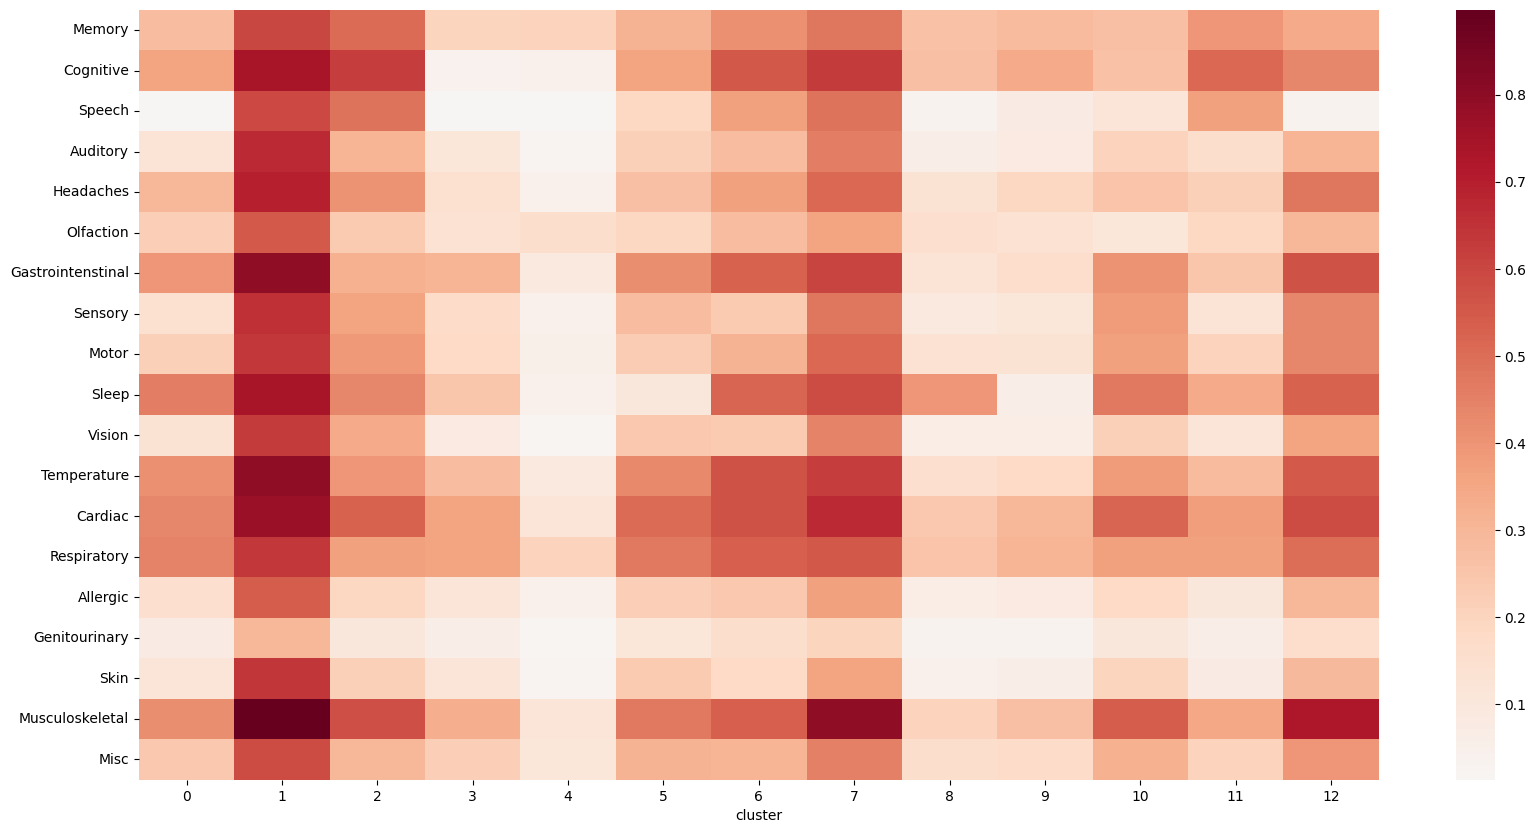

In [192]:
# plot avgdf as heatmap
plt.figure(figsize=(20,10))
sns.heatmap(avgdf.transpose(), cmap='RdBu_r', center=0)

In [195]:
# now instead of taking the average score for each symptom group
# for each patient I want to convert each group into a column which is 
# 1 if any of the symptoms in that group is 1, and 0 otherwise
# then I can take the average over patients

# first I need to convert the symptom columns into a list of lists
# where each list is a symptom group
symptom_groups = []


for grouping in groups_df.group.unique():
    # calculate the average score for each symptom in the group for each cluster in 'cluster'
    keepcols = groups_df.loc[groups_df.group == grouping, 'symptom'].tolist()
    symptom_groups.append(keepcols)
    sympdf[grouping] = 0
    for patient in sympdf.index:
        #print(patient)
        for group in symptom_groups:
            #print(group)
            if sympdf.loc[patient, group].any() == 1:
                sympdf.loc[patient, grouping] = 1
            else:
                sympdf.loc[patient, grouping] = 0

# now I need to go through each patient and for each symptom group
# check if any of the symptoms in that group are 1
# if so, make that symptom group 1 for that patient
# if not, make it 0
# then I can take the average over patients





In [202]:
sympdf

,Symptom_Memory_short,Symptom_Memory_long,Symptom_Memory_no_new_memories,Symptom_Memory_forget_tasks,Symptom_Memory_other,Symptom_Cognitive_Functioning_thinking,Symptom_Cognitive_Functioning_executive,Symptom_Cognitive_Functioning_problemsolving,Symptom_Cognitive_Functioning_slowedthoughts,Symptom_Cognitive_Functioning_fastthoughts,...,Sleep,Vision,Temperature,Cardiac,Respiratory,Allergic,Genitourinary,Skin,Musculoskeletal,Misc
3,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,0,1,1,1,1,0,0,1,1
5,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,1,1,1,1,0,0,0,1,1
6,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,1,1,1,1,0,0,1,1,1
8,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,1,0,1,1,1,0,1,0,1,1
9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1,1,1,1,1,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14158,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,1,1,1,1,1,1,1,1,1
14161,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,1,0,0,1,1,1,1,0,0,1
14163,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,1,1,1,1,1,1,1,0,1,1
14166,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1,1,0,0,0,1,0,0,1,0


In [201]:
groups_df[groups_df['group'].isin(['Misc','misc']) == False]

,symptom,group
0,Symptom_Memory_short,Memory
1,Symptom_Memory_long,Memory
2,Symptom_Memory_no_new_memories,Memory
3,Symptom_Memory_forget_tasks,Memory
4,Symptom_Memory_other,Memory
...,...,...
137,Symptom_Skin_rashes,Skin
138,Symptom_Muscle_spasms,Musculoskeletal
139,Symptom_Muscle_aches,Musculoskeletal
140,Symptom_Joint_pain,Musculoskeletal
